<a href="https://colab.research.google.com/github/jayesh2708/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Jayesh_Yadav_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Bank Marketing Effectiveness Prediction**

## Project Type - Classification
Contribution - Team

Team Member 1 - Racky Kumar

Team Member 2 - Jayesh Yadav

Team Member 3 - Mangal Lokhande

Team Member 4 - Rubina Fathima


**GitHub Link -**

# **Project Summary -**

# **Problem Statement**
### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## **Importing All The Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## **Mount And Load The Data Set**

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Dataset
df= pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Copy of bank-full.csv',delimiter=';')

# **Understanding More About The Data**


### **Summary Of Data**

In [5]:
# View the data of top 5 rows to take a glimps of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#Shape of dataset 
df.shape

(45211, 17)

### **Information About Dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
#List of numerical columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
#list of categorical columns
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [12]:
#Print the unique value
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### **Summary Statastics**


In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### **Check For The Null Values**

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*   **There is no null values in dataset**


### **Checking For Duplicate values**

In [15]:
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0




*   **There is no duplicate value present in dataset.**



### **Target Variable**

In [16]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64



*   **As we see above the data is highly imbalanced**



# **Exploratory Data Analysis**

### On Taraget Variable

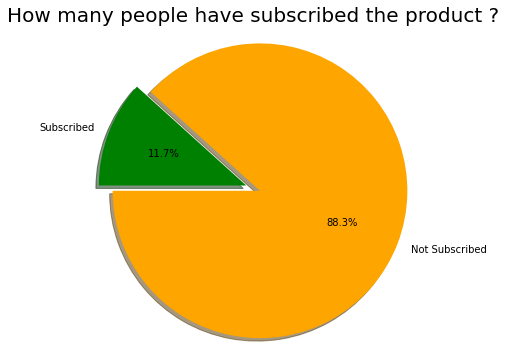

In [17]:
#visualisation of how many customers have subscribed 
labels = 'Not Subscribed' , 'Subscribed'
sizes = df.y.value_counts()
colors = ['orange', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Its is clear from above pie plot that:**


*   **Only 11.7% customers have subscribed tp our product.**
*   **And 88.3% has not not subscribed to our product.** 


   



## **Representation Of Each Variable On Bar Graph**

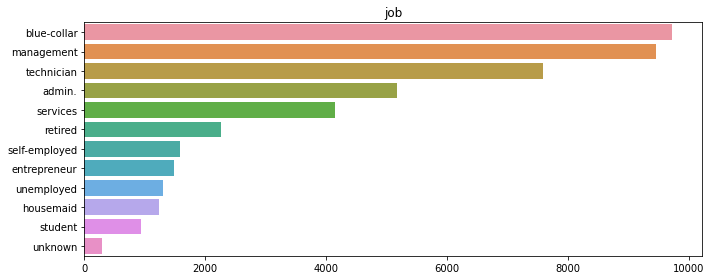

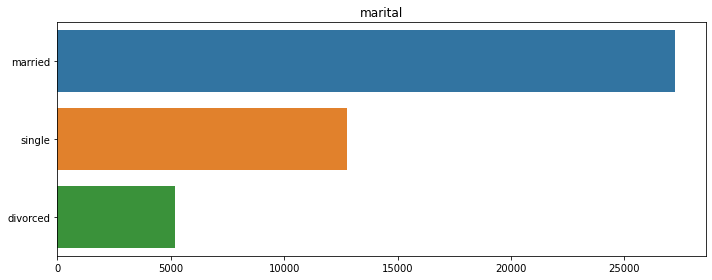

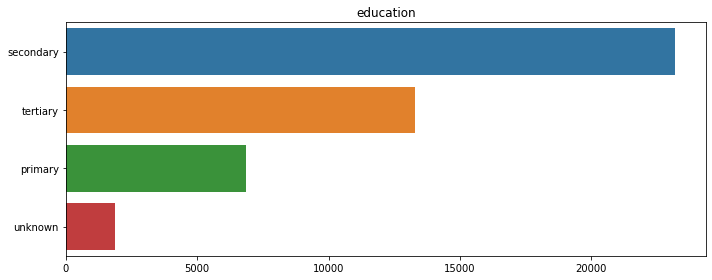

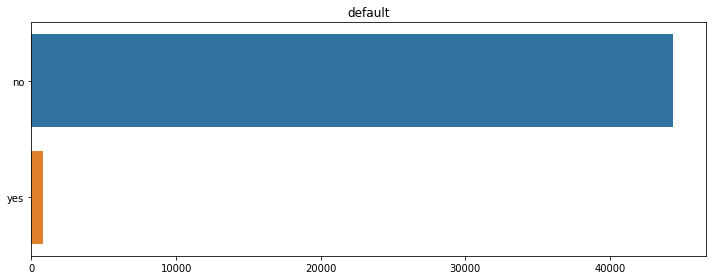

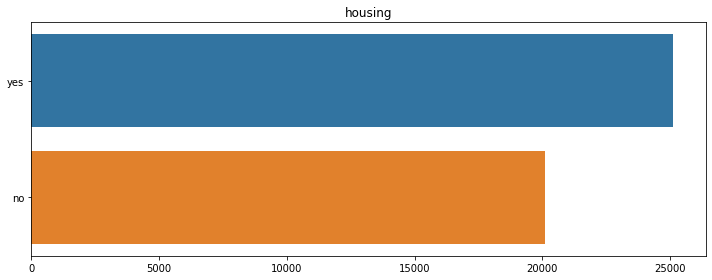

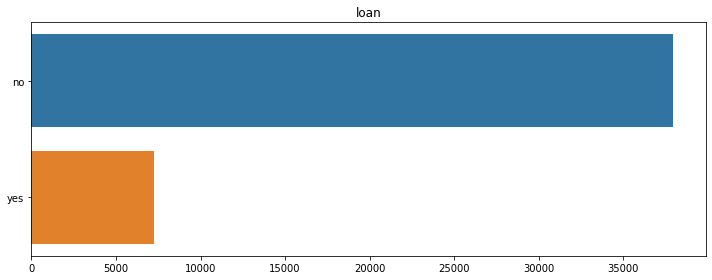

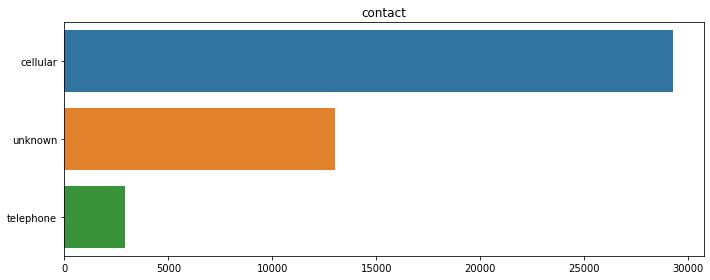

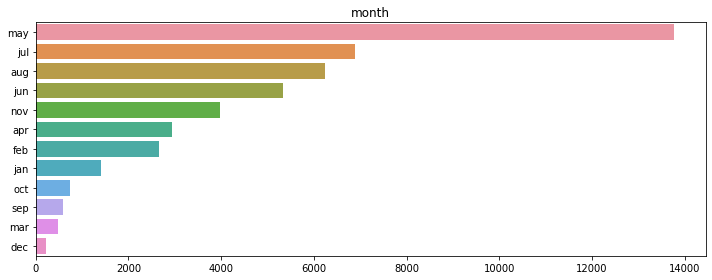

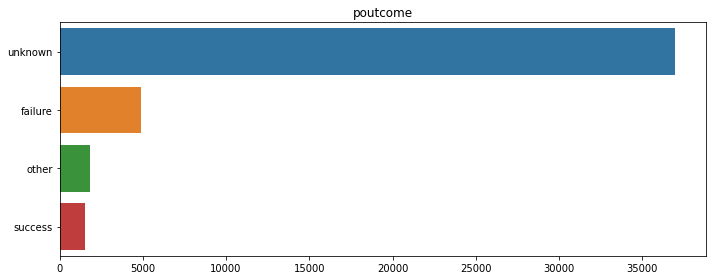

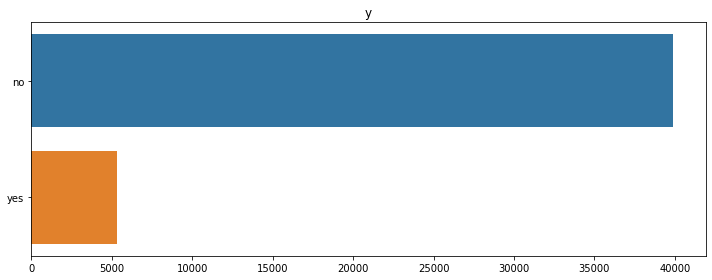

In [19]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

## **Graph Representation of each Categorical variable with respect to Target variable**

In [23]:
sns.set(rc={'figure.figsize':(16,6)})

In [26]:
def bar_compare(x,y):
  sns.set_style("whitegrid")
  plt.figure(figsize=(16,6))
  sns.countplot(x=df[x],data=df,hue=df[y])
  plt.title('Count Plot of {x} for target variable Y'.format(x=x.title(),fontsize = 25))
  plt.show()

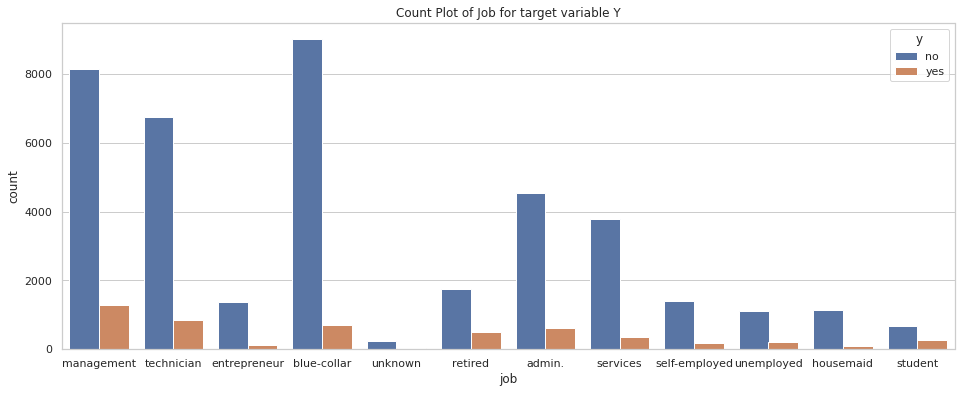

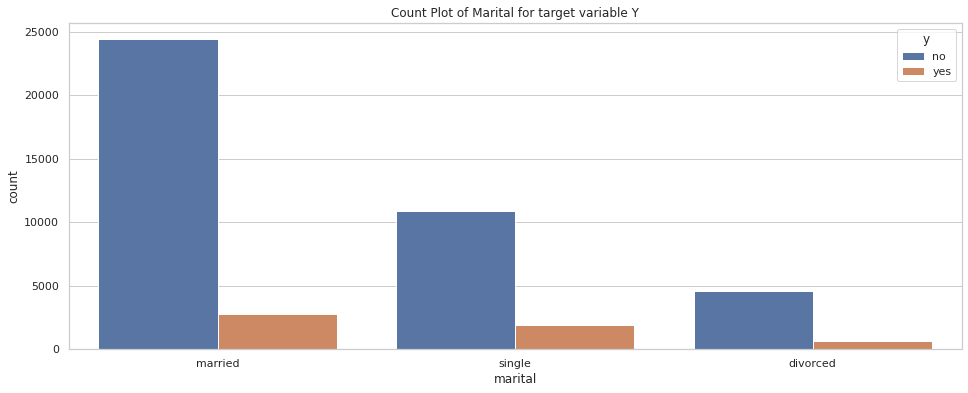

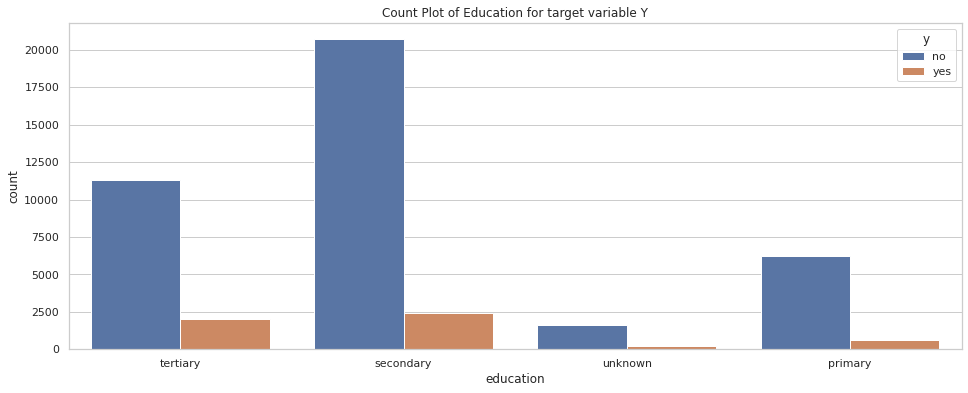

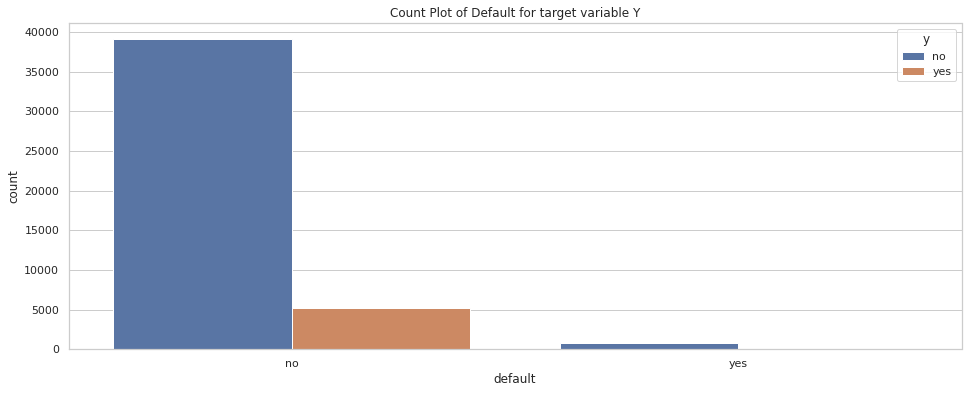

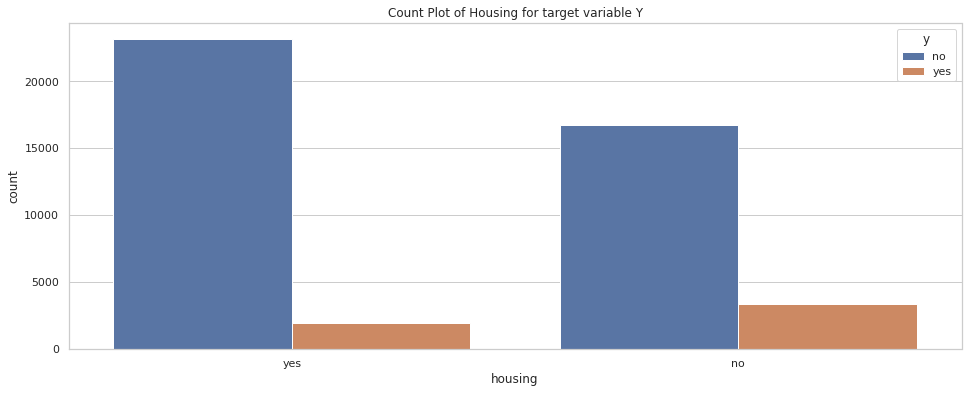

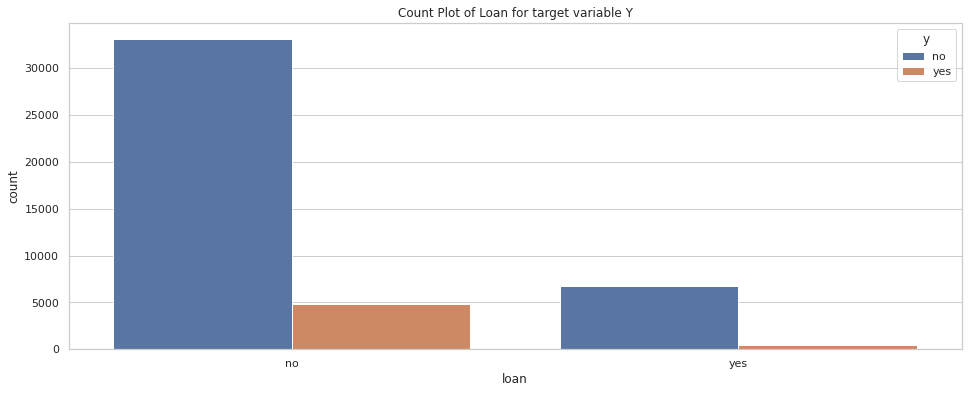

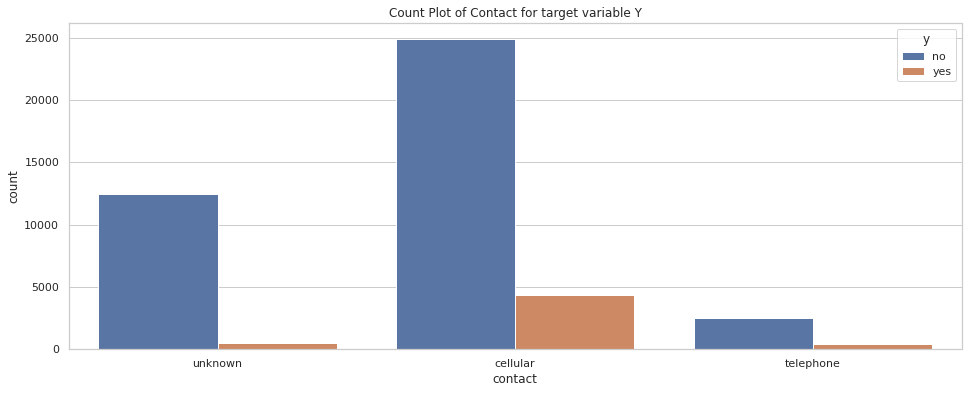

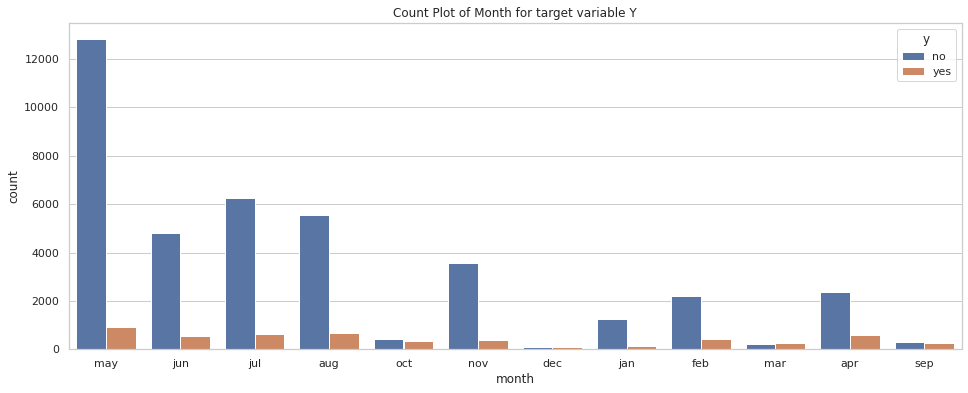

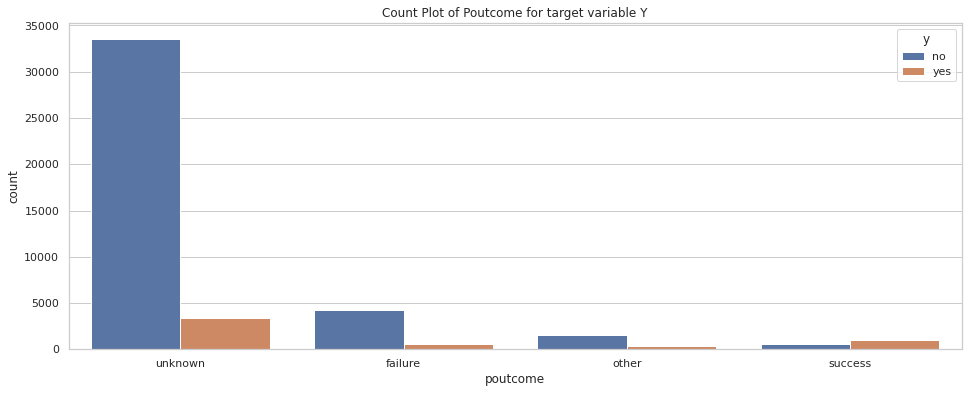

In [27]:
#ploting countplot for different categorical columns
for col in category_cols[:-1]:
  bar_compare(col,'y')

**From the above plots we can conclude that:**

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.
* Success rate is highest for student.
* Most of the clients contacted have previous outcome as 'unknown'.
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March has highest success rate.
* Most of the people are contacted through cellular.
* As seen for default variable, less client are contacted who have loan.
* Very few clients are contacted who are defaulter.
* Most of the people who are contacted have tertiray or secondary education.
* As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.














### **Age distribution in our dataset**

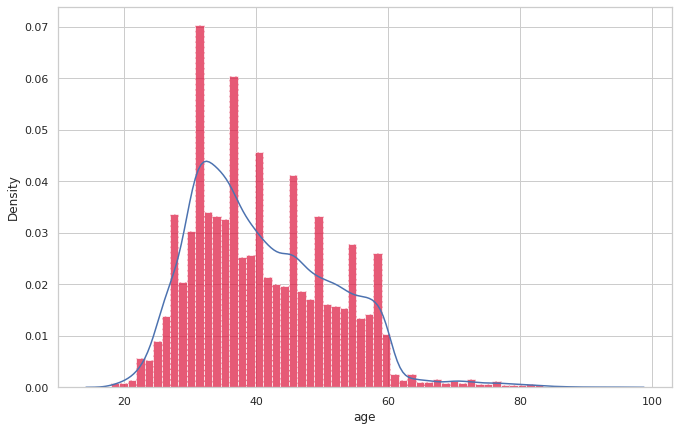

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); 

### **Observation:**
**Our dataset have more number of people in late 20s and early 30s**

## **Pairplot Representation of each variable with respect to Target Variable**

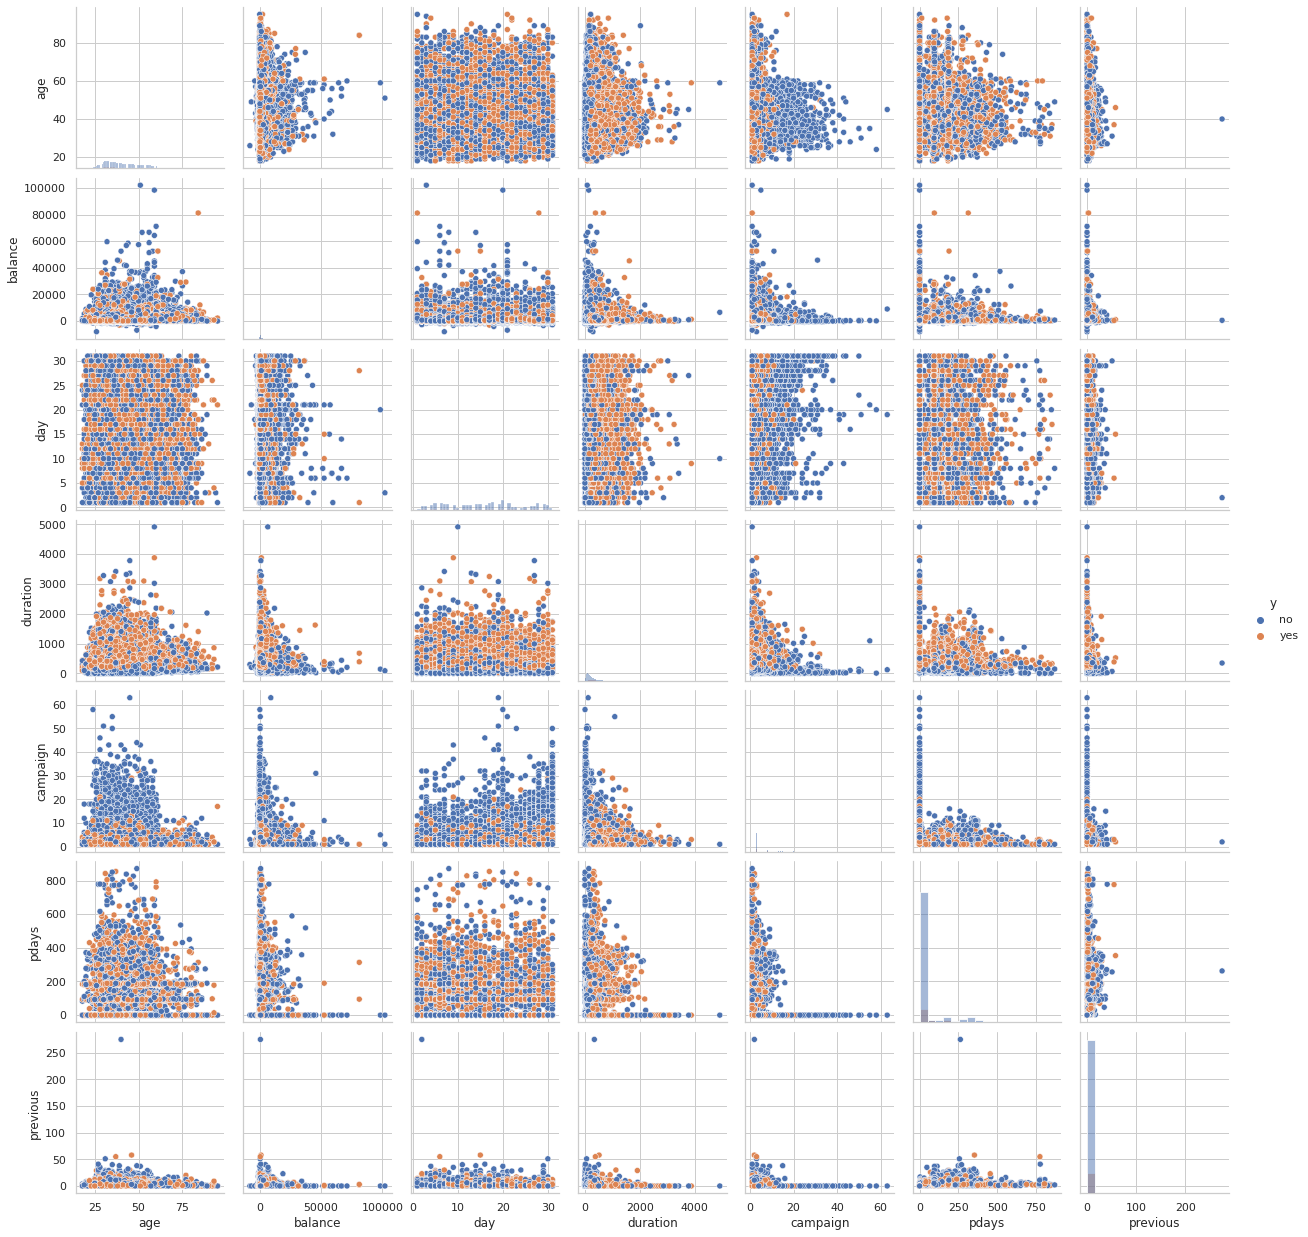

In [29]:
sns.pairplot(df, hue="y",diag_kind="hist")
plt.show()

### **Observation**
* **For most of the variables our pair plot is overlapping a lot.**
* **Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.**

In [ ]:
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

## **Scatter plot distribution of age vs balance**

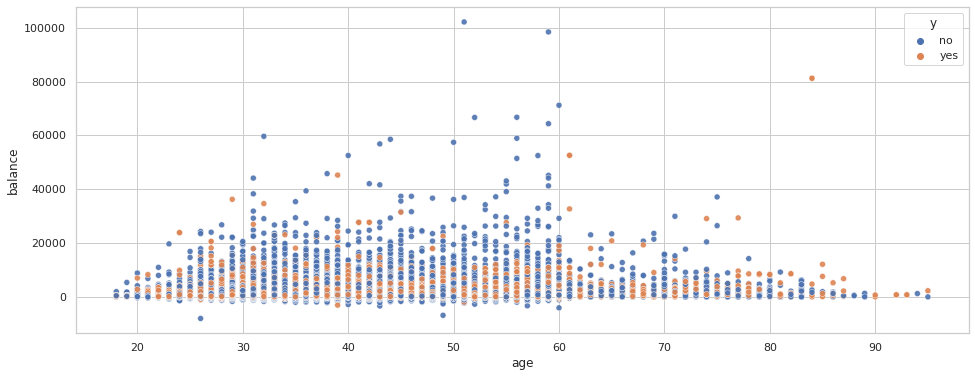

In [30]:
#visualising age and balance with respect to whether customer has subscribed or not
sns.scatterplot(x="age", y="balance",hue='y',data=df,x_bins=50,y_bins=50,alpha=0.9)

**From above scatter plot we can see 40-60 age group people have subscribed the product. People having high balance have very low subscription rate.This also shows that our dataset have some balance below 0 and we can use this scatter plot to remove some outliers from our data set.**

## **Scatter plot distribution of pdays vs duration**

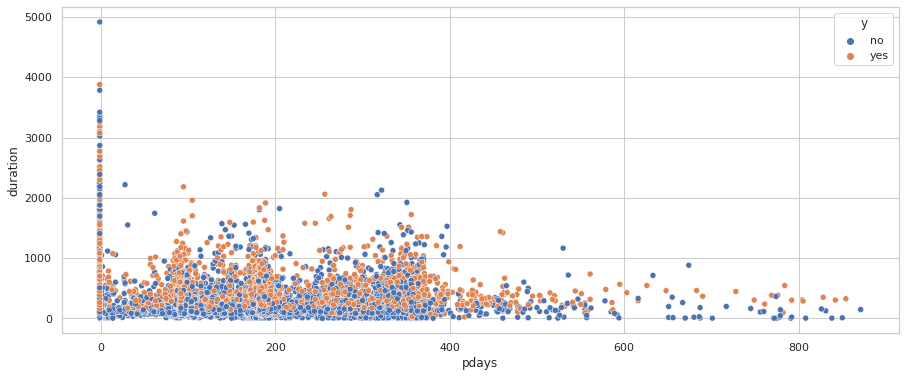

In [31]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['pdays'],y=df['duration'],hue=df['y'])
plt.show()

**As scatter plot is depicting that most of the client that had been last contacted falls in 0-400(days)**

## **Scatter plot distribution of duration vs balance**

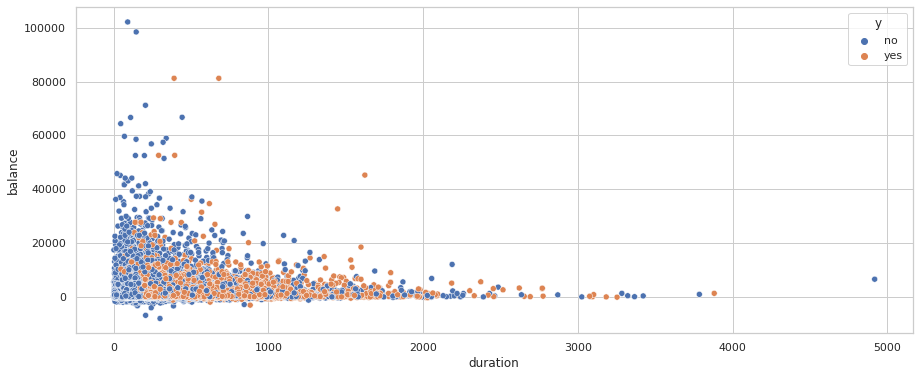

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['duration'],y=df['balance'] ,hue=df['y'])
plt.show()

**Most of the clients who have taken a term deposit do not have very high balance(mostly in between 0-20000)**

In [33]:
#Mean of calls performed in this campaign
df.groupby('y')['campaign'].mean()

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

**On an average 2 calls leads to success for the clients who have taken a term deposit.**

## **Plotting education, campaign, day and sbscribed by taking 6000 random samples**

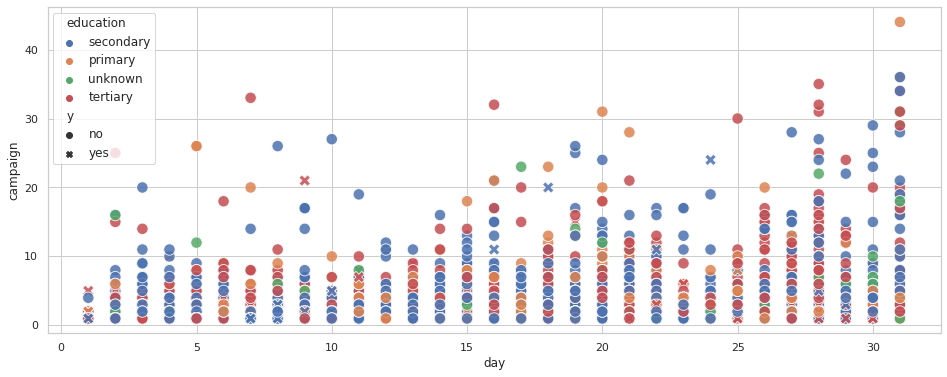

In [37]:
sample=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample,x_bins=50,y_bins=50,alpha=0.85, style="y",s=130 );

**This scatter plot shows that our campaign is more focused on people having secondary education. We also do more campaign on the month end. We need to focus on other education class as well also we need to be more uniform in our campaign accross all days of month.**

## **Visualising age and balance relation with respect to subscribed**

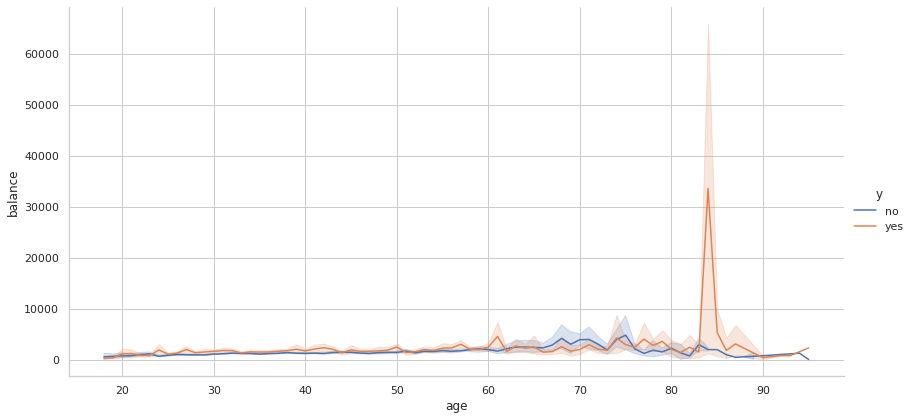

In [38]:
sns.relplot(x="age", y="balance", kind="line", data=df, hue='y',height=6,aspect=2 );

***We can see that for age 20-60 people with having higher balance  are the ones who subscribe more. But as we move towards higher age we see mixed distribution of subscribing term deposit.*** 

# **Outliers Detection On Different Features**

### **1. Outliers detection on duration feature**

Text(0.5, 0, 'y:target variable')

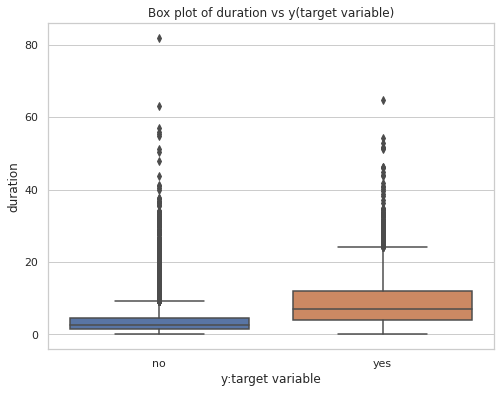

In [39]:
# converting call duration from seconds to minute
plt.figure(figsize=(8,6))
df['duration'] = df['duration']/60
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

### **2. Outliers detection on pdays feature**

Text(0.5, 0, 'y: target variable')

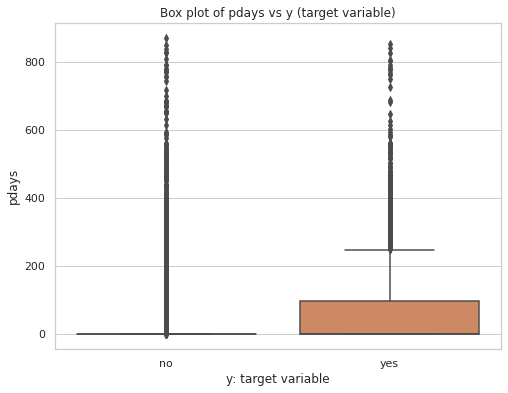

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

### **3. Outliers detection on previous feature**

Text(0.5, 0, 'y:target variable')

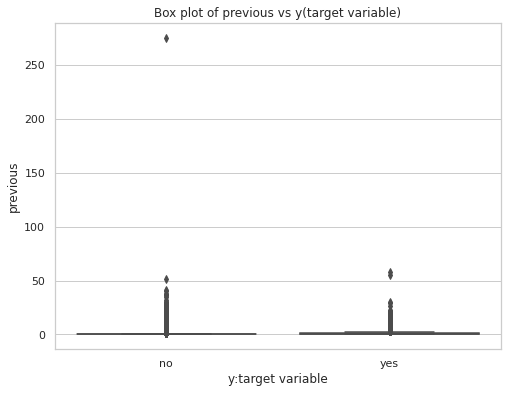

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

### **4. Outliers detection on age feature**

Text(0.5, 0, 'y:target variable')

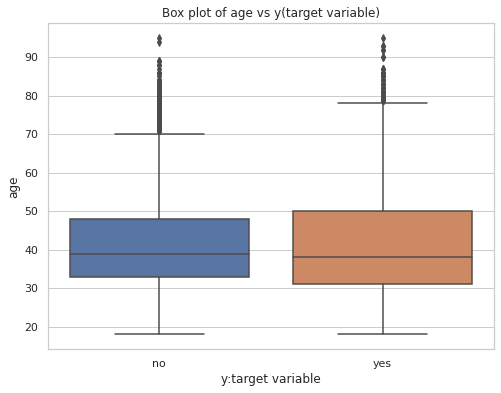

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

***We can see that there are many outliers in 'Yes' as well as in 'No' of features shown above.*** 

In [43]:
#Making copy of our dataframe
data=df.copy()

## **Replacing yes with 1 and No with 0**

In [49]:
data.replace(to_replace={'y':'yes'}, value=1, inplace=True)
data.replace(to_replace={'y':'no'}, value=0, inplace=True)


## **Convert categorical variables into numeric**

In [50]:
# Converting categorical variables into numeric
data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes
data['month'] = data['month'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes

## **Heatmap of the dataset**


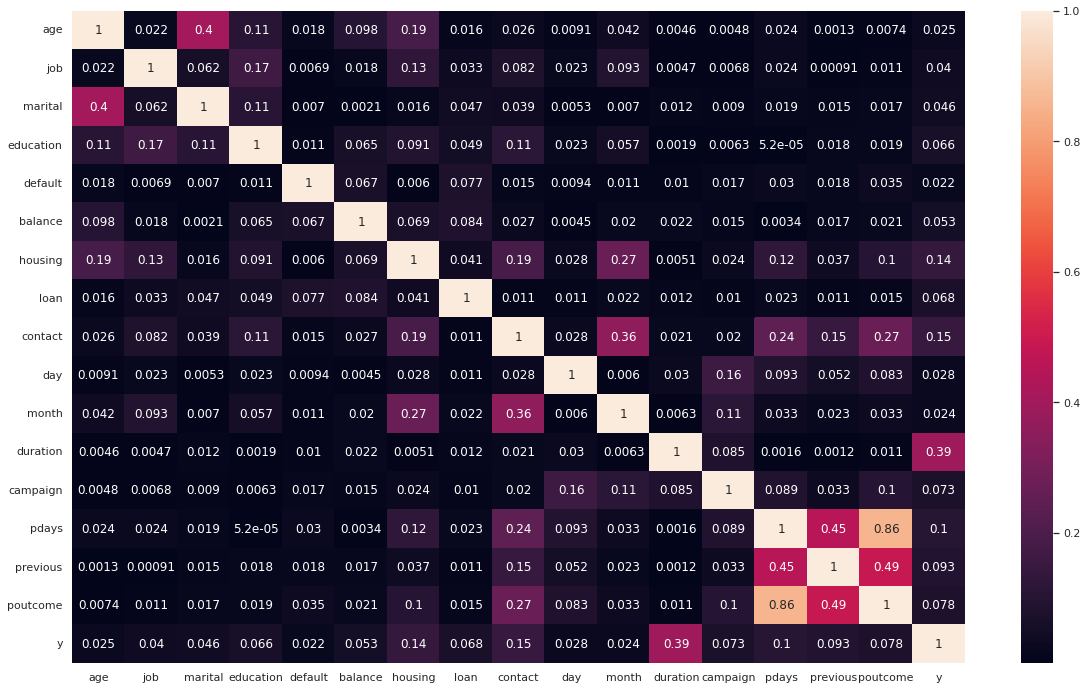

In [51]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr().abs(), annot=True)

**This shows that duration and housing are highly correlated with target variable y (Y/N). Also pdays are also impacting poutcome.**